TABLE OF CONTENTS
1. IMPORTING LIBRARIES

2. LOADING DATA

3. DATA CLEANING

4. DATA PREPROCESSING

5. DIMENSIONALITY REDUCTION

6. CLUSTERING

7. EVALUATING MODELS

8. PROFILING

9. CONCLUSION

10. END

In [57]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
#importig dataset
data=pd.read_csv("C:\\Users\\Prajwal\\Downloads\\diabetic_data.csv")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 101766


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

From the above output, we can conclude and note that:

There are missing values in incoime
There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.
First of all, for the missing values, we are simply going to drop the rows (not always recommended) that have missing income values.



In [4]:
#length of the dataset
data.shape

(101766, 50)

In [5]:
# summarizing the statistics for each numerical column
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
#Display the first few rows 
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


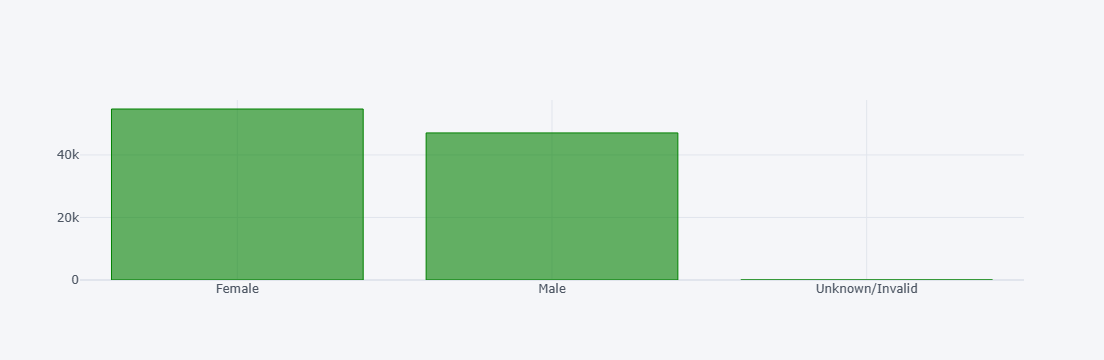

In [7]:
data['gender'].value_counts().iplot(kind='bar',color='green')

"In the hospital, there are more female patients than male patients, with unknown/invalid gender entries also present."







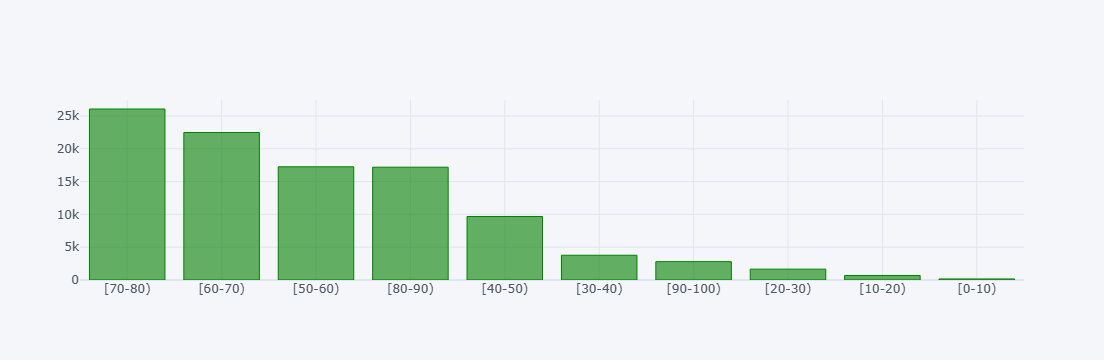

In [8]:
data['age'].value_counts().iplot(kind='bar',color='green')

"In the hospital, there is a higher admission rate among people aged 70-80, followed by those aged 60-70, then 50-60, 40-50, 30-40, 20-30, and finally 10-20, with admissions for individuals under 10 years old being the least frequent."


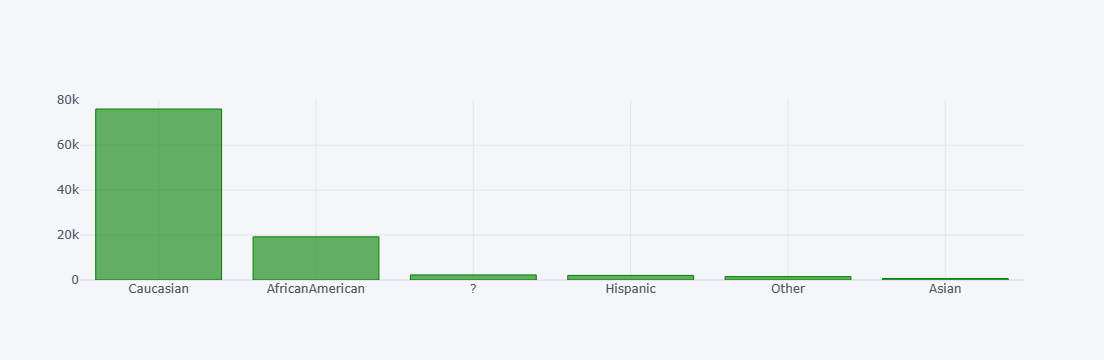

<Figure size 2800x1200 with 0 Axes>

In [9]:
plt.figure(figsize=(14,6),dpi=200)
data['race'].value_counts().iplot(kind='bar',color='green')

This information provides insights into the racial demographics of the patient population within the dataset, with Caucasians being the most represented group, followed by African Americans, individuals with unknown race, Hispanics, and finally, individuals categorized under 'Other'.







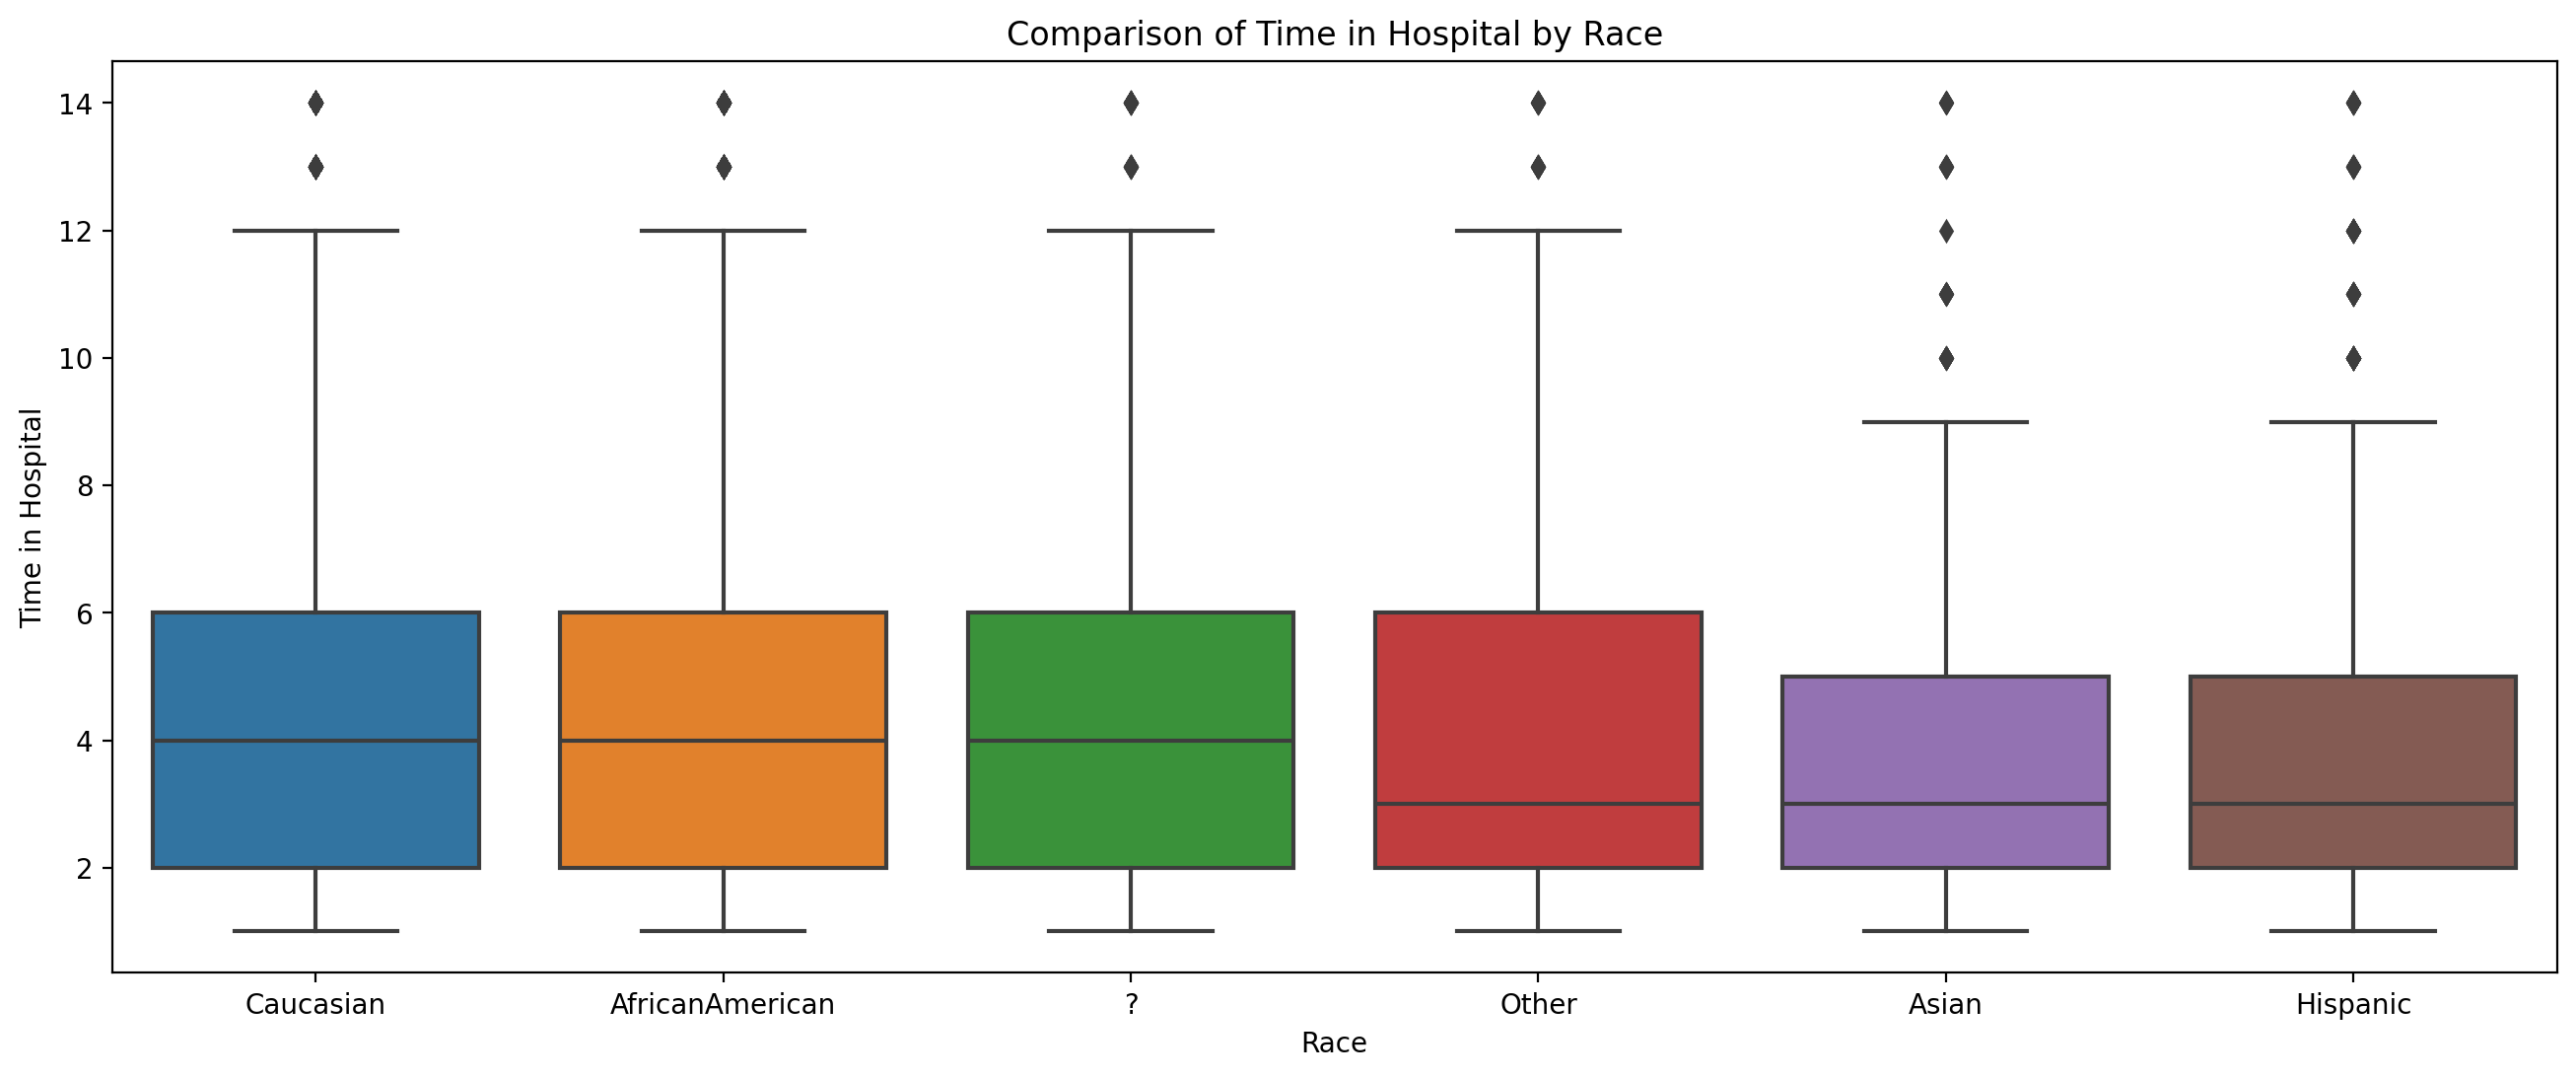

In [10]:
plt.figure(figsize=(16,6),dpi=200)
sns.boxplot(data=data, x='race', y='time_in_hospital')
plt.xlabel('Race')
plt.ylabel('Time in Hospital')
plt.title('Comparison of Time in Hospital by Race')
plt.show()

This information provides insights into the racial demographics of the patient population within the dataset, with Caucasians being the most represented group, followed by African Americans, individuals with unknown race, Hispanics, and finally, individuals categorized under 'Other'.ed


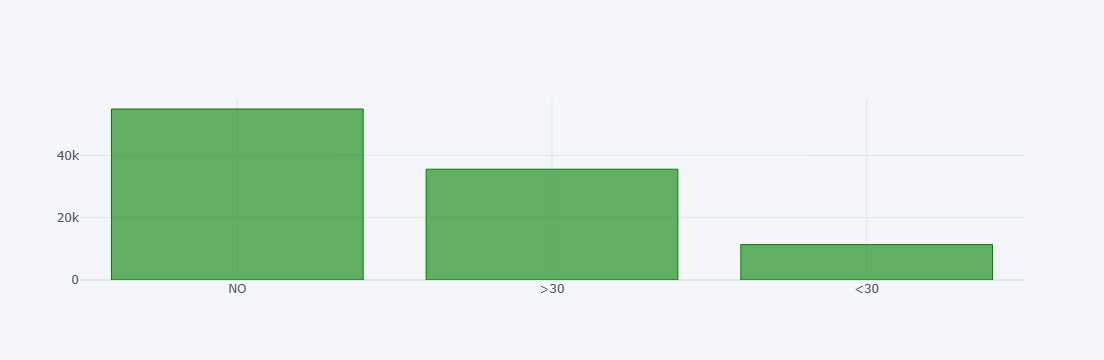

In [11]:
data['readmitted'].value_counts().iplot(kind='bar',color='green')

In [12]:
data['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

This information is crucial for understanding patient outcomes, healthcare utilization patterns, and the effectiveness of treatments or interventions in managing chronic conditions such as diabetes.betes.

In [13]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

This information is useful for understanding the structure of the dataset and identifying the variables or features available for analysis.

In [14]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

calculate the count of missing values in each column of the dataset data, providing insight into the completeness of the data and potential areas that may require data imputation or cleaning.







In [15]:
#To remove the NA values
data.dropna(axis=1,inplace=True)
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 101766


#Feature Engineering

In [16]:
data['weight'] = data['weight'].replace('?', np.nan)
data['payer_code']=data['payer_code'].replace('?', np.nan)
data['medical_specialty']=data['medical_specialty'].replace('?', np.nan)
data['diag_1']=data['diag_1'].replace('?',np.nan)
data['diag_2']=data['diag_2'].replace('?', np.nan)
data['diag_3']=data['diag_3'].replace('?', np.nan)

these lines of code represent data preprocessing steps to handle missing values in specific columns ('weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3') of the dataset data. By replacing '?' with np.nan, it standardizes the representation of missing values across these columns, facilitating subsequent data analysis or modeling tasks.







In [17]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

This information helps users understand the completeness of the dataset and identify columns with missing data that may require further investigation or imputation before analysis.

In [18]:
#Droping the NA Value
data.drop('weight',axis=1,inplace=True)

In [19]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


"After removing the columns with missing values, we are left with 47 out of the original 50 columns."

In [20]:
#by using generalized imputation we have filling the missing value with mode
data['diag_1'].fillna(data['diag_1'].mode()[0],inplace=True)
data['diag_2'].fillna(data['diag_2'].mode()[0],inplace=True)
data['diag_3'].fillna(data['diag_3'].mode()[0],inplace=True)

 these lines of code represent a method of imputing missing values in specific columns ('diag_1', 'diag_2', 'diag_3') of the dataset data using the mode. Generalized imputation with the mode is a common strategy to handle missing categorical data when the mode is well-defined and representative of the data distribution.







In [21]:
#DATA PREPROCESSING
#In this section, we will be preprocessing the data to perform clustering operations.

#The following steps are applied to preprocess the data:

#Label encoding the categorical features
#Scaling the features using the standard scaler
#Creating a subset dataframe for dimensionality reduction
data['readmitted'] = data['readmitted'].replace({'>30': 'Yes', '<30': 'Yes'})
print(data['readmitted'])


0          NO
1         Yes
2          NO
3          NO
4          NO
         ... 
101761    Yes
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object


It categorizes patients who were readmitted, regardless of the time frame, as 'Yes'. This may be useful for simplifying the analysis or modeling tasks where distinguishing between readmitted and non-readmitted patients within a specific time frame is not necessary.







In [22]:
ordinal_mapping={
    k:i
    for i,k in enumerate(data['gender'].unique(),0)
}
ordinal_mapping
data['gender']=data['gender'].map(ordinal_mapping)

This mapping can be used for encoding categorical variables into numerical values, which may be necessary for certain machine learning algorithms or data analysis tasks.







In [23]:
def find_category_mappings(df,varible):
    return { k:i for i,k in enumerate(df[varible].unique(),0)}

def integer_encode(data,variable,ordinal_mapping):
    data[varible]=data[varible].map(ordinal_mapping)
for varible in['age','payer_code', 'medical_specialty',
       'diag_1','diag_2', 'diag_3','metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed','readmitted']:
    mappings=find_category_mappings(data,varible)
    integer_encode(data,varible,mappings)

These functions represent a method for encoding categorical variables into numerical values. The find_category_mappings function generates ordinal mappings for each unique category in a variable, while the integer_encode function applies these mappings to encode the categorical variable into integers. This encoding step is often necessary for machine learning algorithms that require numerical input data.







In [24]:
data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

This information helps users understand the completeness of the dataset and identify columns with missing data that may require further investigation or imputation before analysis.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  int64 
 4   age                       101766 non-null  int64 
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                101766 non-null  int64 
 10  medical_specialty         101766 non-null  int64 
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 
 14  numb

"Now, all data are in integer format."







In [26]:
data['race']=data['race'].replace('?',np.nan)
data['race'].fillna(data['race'].mode()[0],inplace=True)
data['race'].value_counts()

race
Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

It ensures consistency and handles missing values by replacing '?' with np.nan and then filling missing values with the mode of the column. The final line provides the distribution of race categories in the dataset after preprocessing.







In [27]:
dummies=pd.get_dummies(data.race)
print(dummies)

        AfricanAmerican  Asian  Caucasian  Hispanic  Other
0                 False  False       True     False  False
1                 False  False       True     False  False
2                  True  False      False     False  False
3                 False  False       True     False  False
4                 False  False       True     False  False
...                 ...    ...        ...       ...    ...
101761             True  False      False     False  False
101762             True  False      False     False  False
101763            False  False       True     False  False
101764            False  False       True     False  False
101765            False  False       True     False  False

[101766 rows x 5 columns]


The process of generating dummy variables for categorical data using one-hot encoding. The resulting DataFrame dummies provides a transformed representation of the 'race' column, facilitating further analysis or modeling tasks.







In [29]:
final_data=pd.concat([data,dummies],axis='columns')

The process of incorporating one-hot encoded dummy variables into the original dataset. The resulting DataFrame final_data can be used for subsequent analysis or modeling tasks, where the categorical variable 'race' has been transformed into a numerical format suitable for machine learning algorithms.







In [30]:
final_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,2278392,8222157,Caucasian,0,0,6,25,1,1,0,...,0,0,0,0,0,False,False,True,False,False
1,149190,55629189,Caucasian,0,1,1,1,7,3,0,...,0,0,1,1,1,False,False,True,False,False
2,64410,86047875,AfricanAmerican,0,2,1,1,7,2,0,...,0,0,0,1,0,True,False,False,False,False
3,500364,82442376,Caucasian,1,3,1,1,7,2,0,...,0,0,1,1,0,False,False,True,False,False
4,16680,42519267,Caucasian,1,4,1,1,7,1,0,...,0,0,1,1,0,False,False,True,False,False


In [32]:
df=final_data.drop(['encounter_id','patient_nbr','payer_code','medical_specialty','race'],axis=1)

In [33]:
df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,0,0,6,25,1,1,41,0,1,0,...,0,0,0,0,0,False,False,True,False,False
1,0,1,1,1,7,3,59,0,18,0,...,0,0,1,1,1,False,False,True,False,False
2,0,2,1,1,7,2,11,5,13,2,...,0,0,0,1,0,True,False,False,False,False
3,1,3,1,1,7,2,44,1,16,0,...,0,0,1,1,0,False,False,True,False,False
4,1,4,1,1,7,1,51,0,8,0,...,0,0,1,1,0,False,False,True,False,False


In [38]:
df.corr()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,AfricanAmerican,Asian,Caucasian,Hispanic,Other
gender,1.000000,-0.050535,0.014592,-0.020847,-0.003843,-0.029928,-0.003103,0.059980,-0.022023,-0.011481,...,0.004779,-0.002907,0.014905,0.015901,-0.018087,-0.070579,0.006619,0.061326,0.000423,0.010210
age,-0.050535,1.000000,-0.007209,0.114323,0.044696,0.107515,0.020770,-0.030104,0.041847,0.023724,...,0.002512,-0.000190,-0.036019,-0.022601,0.030403,-0.159758,0.001014,0.177057,-0.063819,-0.025865
admission_type_id,0.014592,-0.007209,1.000000,0.083483,0.106654,-0.012500,-0.143713,0.129888,0.079535,0.026511,...,-0.000074,0.002117,0.007274,-0.000310,-0.004923,-0.102260,0.008044,0.080814,0.029615,0.010182
discharge_disposition_id,-0.020847,0.114323,0.083483,1.000000,0.018193,0.162748,0.023415,0.015921,0.108753,-0.008715,...,-0.000181,-0.000425,-0.012307,-0.028887,-0.014852,0.008030,-0.014037,0.000715,-0.010414,-0.007240
admission_source_id,-0.003843,0.044696,0.106654,0.018193,1.000000,-0.006965,0.048885,-0.135400,-0.054533,0.027244,...,-0.001914,-0.003667,0.002435,0.001500,0.039986,-0.019424,-0.004022,0.014380,0.013728,-0.000444
time_in_hospital,-0.029928,0.107515,-0.012500,0.162748,-0.006965,1.000000,0.318450,0.191472,0.466135,-0.008916,...,-0.000588,0.001684,0.109173,0.062520,0.051289,0.018078,-0.010686,-0.008006,-0.016091,-0.005026
num_lab_procedures,-0.003103,0.020770,-0.143713,0.023415,0.048885,0.318450,1.000000,0.058066,0.268161,-0.007602,...,0.001218,-0.003202,0.063958,0.033107,0.039253,0.024259,-0.007622,-0.021008,-0.002196,0.002126
num_procedures,0.059980,-0.030104,0.129888,0.015921,-0.135400,0.191472,0.058066,1.000000,0.385767,-0.024819,...,0.004315,-0.000624,0.004448,-0.006821,-0.044748,-0.029710,0.000235,0.029828,-0.018675,0.013853
num_medications,-0.022023,0.041847,0.079535,0.108753,-0.054533,0.466135,0.268161,0.385767,1.000000,0.045197,...,0.007897,0.001534,0.246846,0.186910,0.046772,-0.038752,-0.026744,0.056343,-0.035018,-0.012605
number_outpatient,-0.011481,0.023724,0.026511,-0.008715,0.027244,-0.008916,-0.007602,-0.024819,0.045197,1.000000,...,-0.001292,-0.000914,0.024794,0.016456,0.082142,-0.049267,-0.012816,0.053052,-0.005059,-0.010933


Next, let us look at the correlation amongst the features. (Excluding the categorical attributes at this point)



<Axes: >

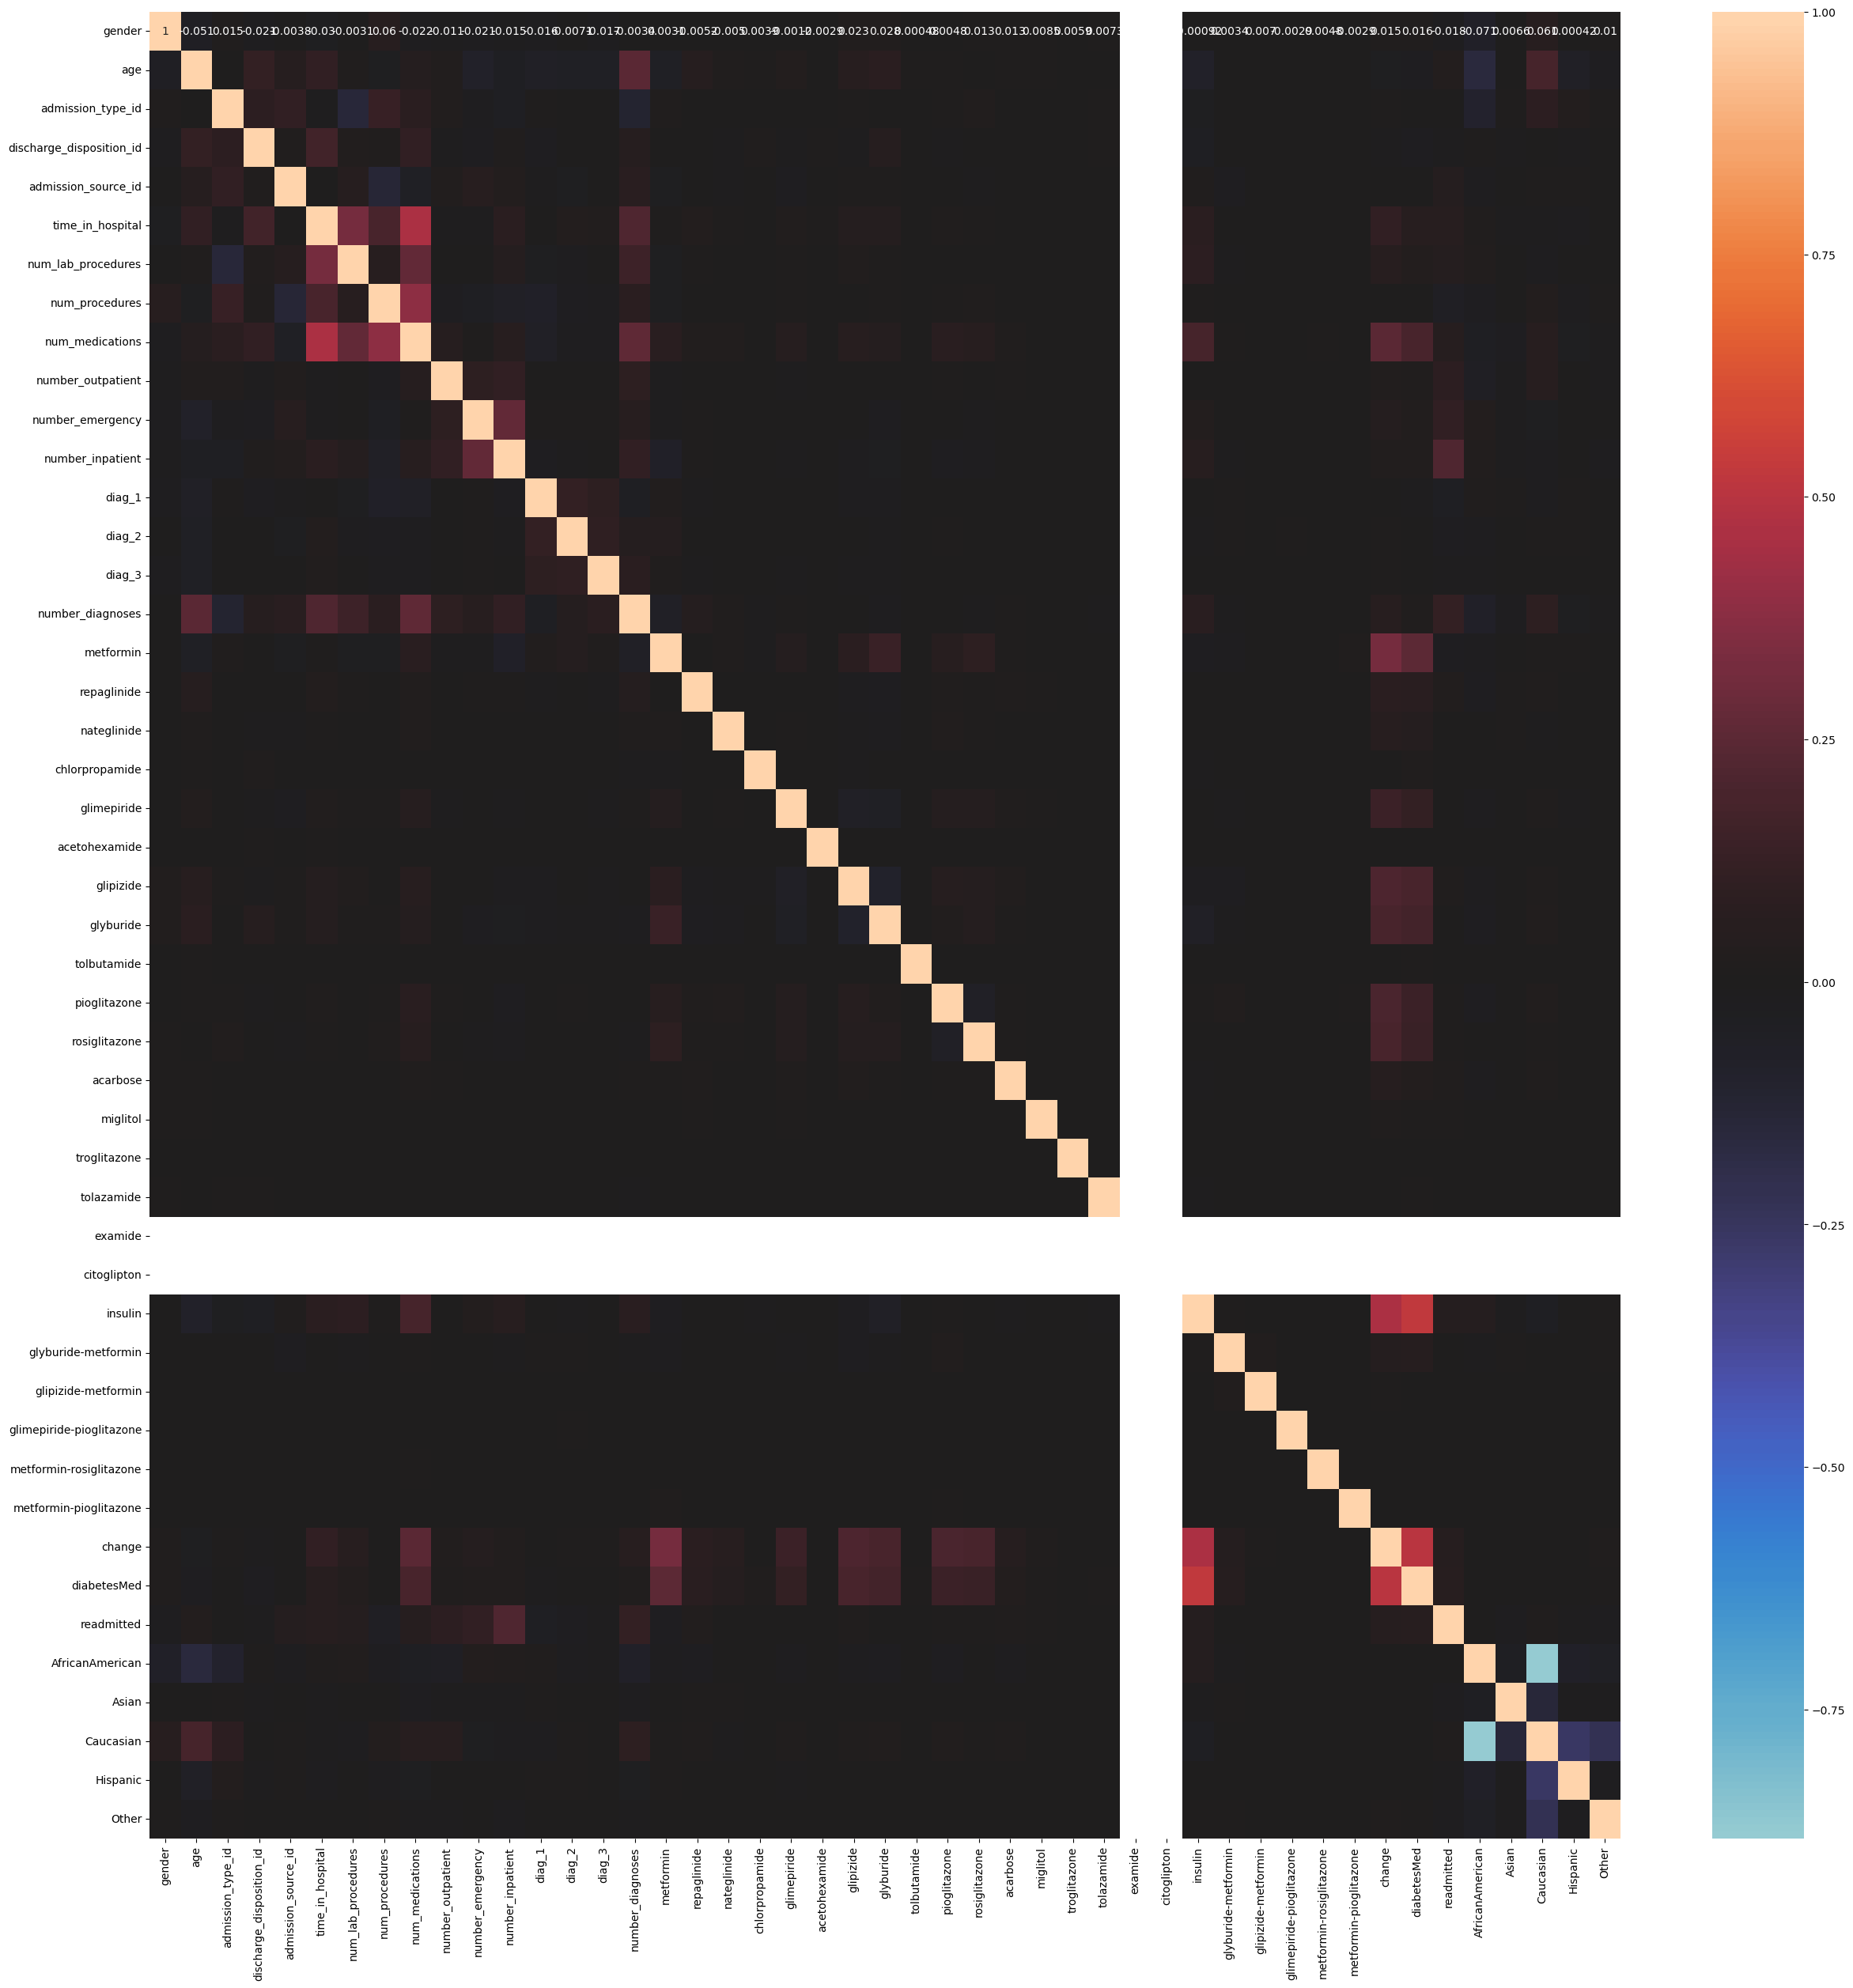

In [37]:
#correlation matrix
plt.figure(figsize=(30,30))  
sns.heatmap(df.corr(),annot=True,center=0)

The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data.

DIMENSIONALITY REDUCTION

In this problem, there are many factors on the basis of which the final clustering will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why we will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

Steps in this section:

Dimensionality reduction with PCA
Plotting the reduced dataframe
Dimensionality reduction with PCA

In [41]:
#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(df)
data_pca = pca.transform(df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-126.907233,-30.144918,14.290013
1,-125.319820,-29.887334,14.314855
2,-123.471138,-29.190269,14.107593
3,-121.903919,-28.984593,14.142037
4,-123.230540,-25.961343,14.143300


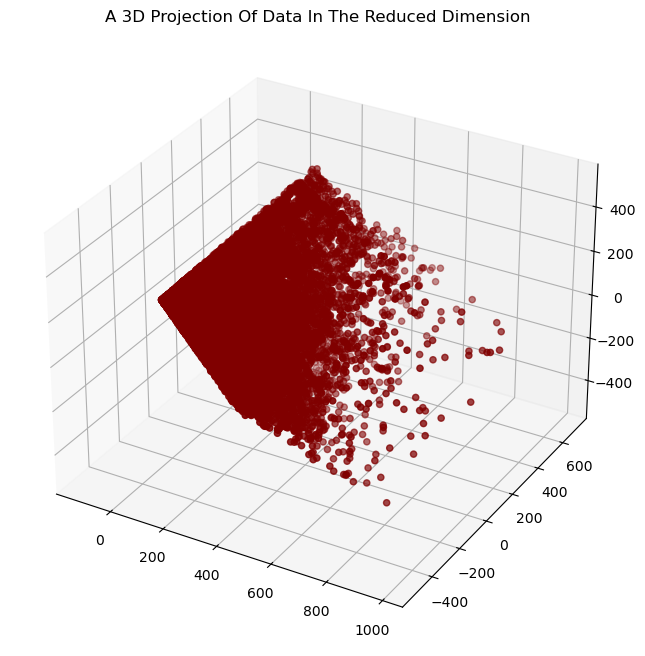

In [42]:
#A 3D Projection Of Data In The Reduced Dimension
x =data_pca["PC1"]
y =data_pca["PC2"]
z =data_pca["PC3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

<Axes: >

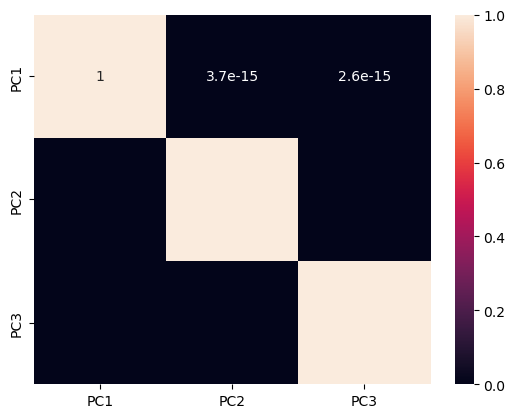

In [43]:
sns.heatmap(data_pca.corr(),annot=True)

In [45]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(data_pca)
scaled_X=pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
scaled_X


,PC1,PC2,PC3
0,-126.907233,-30.144918,14.290013
1,-125.319820,-29.887334,14.314855
2,-123.471138,-29.190269,14.107593
3,-121.903919,-28.984593,14.142037
4,-123.230540,-25.961343,14.143300
...,...,...,...
101761,143.261763,105.099236,184.676651
101762,-14.372989,-64.158328,-39.347327
101763,40.140669,42.999577,92.685789
101764,-70.748004,-9.070825,33.418300


CLUSTERING

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering

Elbow Method to determine the number of clusters to be formed
Clustering via Agglomerative Clustering
Examining the clusters formed via scatter plot

Text(0.5, 1.0, 'Elbow Method')

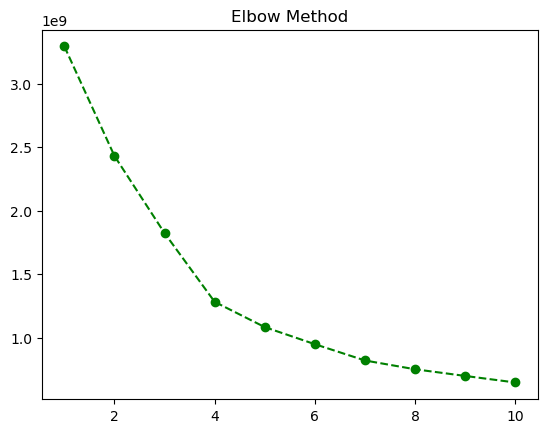

In [49]:
wcss=[]
for k in range(1,11):
    model=KMeans(n_clusters=k,init='k-means++',random_state=101)
    model.fit(scaled_X)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss,'go--')
plt.title('Elbow Method')

Elbow Method to determine the number of clusters to be formed:


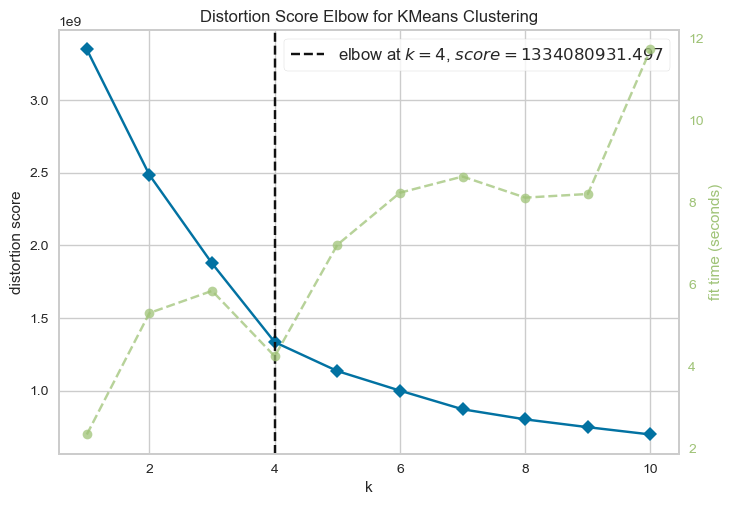

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
print('Elbow Method to determine the number of clusters to be formed:')
Kmeans_yellow=KMeans()
graph=KElbowVisualizer(Kmeans_yellow,k=(1,11))
graph.fit(df)
graph.poof()

The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.



In [52]:
new_kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
new_kmeans.fit(scaled_X)
labels1=new_kmeans.labels_
centers=neVw_kmeans.cluster_centers_

In [53]:
labels1

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
centers

array([[ -55.39839071,  -14.63269463,    7.43449745],
       [ 198.16654916, -167.33815889,   -6.24215508],
       [ 128.47598097,  148.9203323 ,  174.77809981],
       [  68.06013454,  109.90969174, -156.09924028]])

In [58]:
print(f"silhouette Score(n=4):{silhouette_score(scaled_X,labels1)}")

silhouette Score(n=4):0.5059254347295424


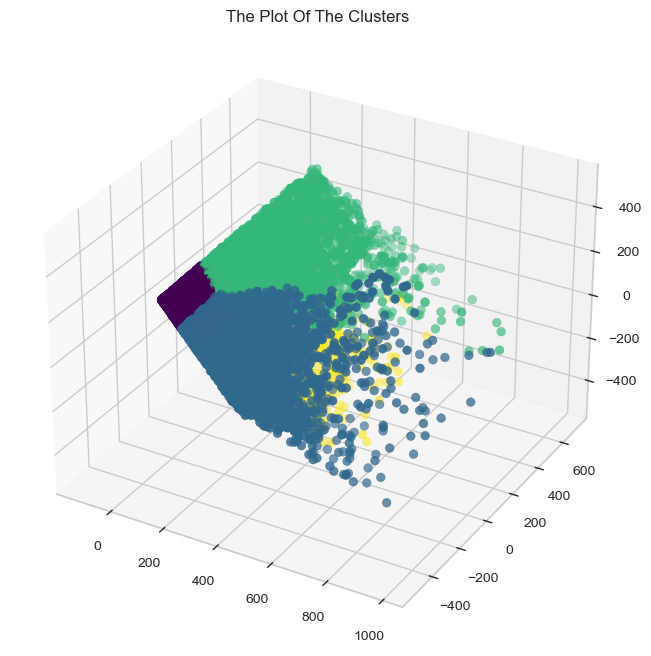

In [63]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=labels1, marker='o',cmap='viridis')
ax.set_title("The Plot Of The Clusters")
plt.show()

EVALUATING MODELS

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

Firstly, let us have a look at the group distribution of clustring



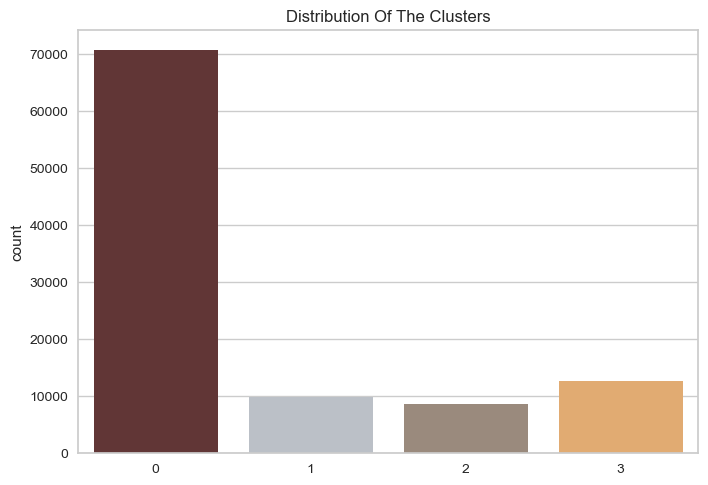

In [65]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=labels1, palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters seem to be fairly distributed.



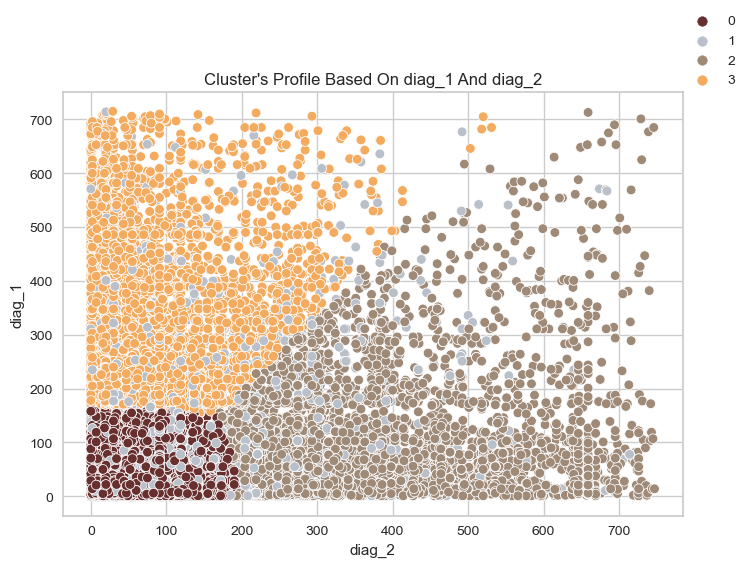

In [73]:
pl = sns.scatterplot(data = data,x='diag_2', y='diag_1',hue=labels1, palette= pal)
pl.set_title("Cluster's Profile Based On diag_1 And diag_2")
plt.legend(loc=[1,1])
plt.show()

diag_1 vs diag_2 shows the clusters pattern

group 0: low diag_1 & average diag_2

group 1: high diag_1 & diag_2

group 2: low diag_1 & low diag_2

group 3: high sdiag_1 & low diag_2


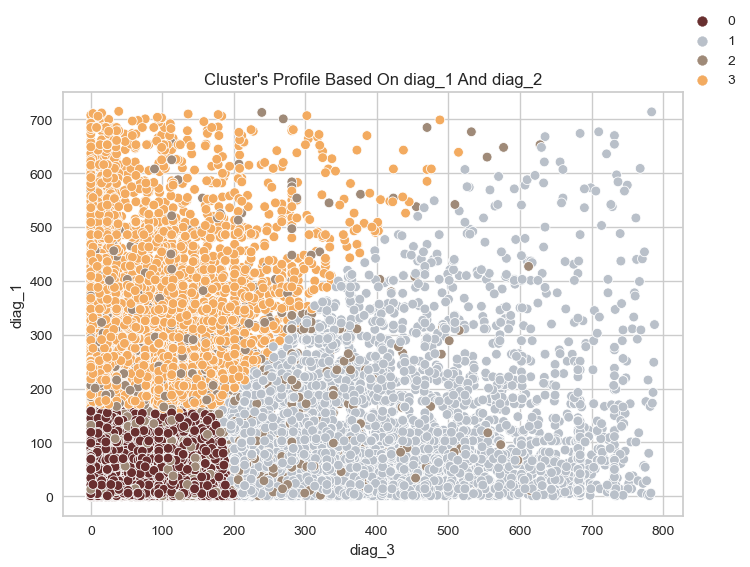

In [80]:
pl = sns.scatterplot(data = data,x='diag_3', y='diag_1',hue=labels1, palette= pal)
pl.set_title("Cluster's Profile Based On diag_1 And diag_2")
plt.legend(loc=[1,1])
plt.show()

diag_1 vs diag_2 shows the clusters pattern

group 0: low diag_1 & average diag_2

group 1: high diag_1 & diag_2

group 2: low diag_1 & low diag_2

group 3: high sdiag_1 & low diag_2

Profiling the Clusters

Cluster 0 :

They are parent

They have a maximum of 4 members in the family and a minimum of 2

Single parents are a subset of this group

Most of them have a teenager at home

Relatively older

Cluster 1:

They are not parent

At max, they are only 2 members in the family

Number of couples is slightly more than the number of singles

Span all ages

A high income group

Cluster 2:

The majority of these people are parents

Maximum 3 members are there in the family

They mainly have one kid (and not teenagers mainly)
Relatively younger

Cluster 3:

They are a parent

Maximum 5 members in the family and minimum 2

Majority of them have a teenager at home
Relatively older

A lower income group










